In [35]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
assets = ['CIEL3.SA', '^BVSP']

pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [37]:
pf_data.head()

,CIEL3.SA,^BVSP
Date,,
2010-01-04,2.751010,70045.0
2010-01-05,2.731857,70240.0
2010-01-06,2.724894,70729.0
2010-01-07,2.789317,70451.0
2010-01-08,2.754494,70263.0


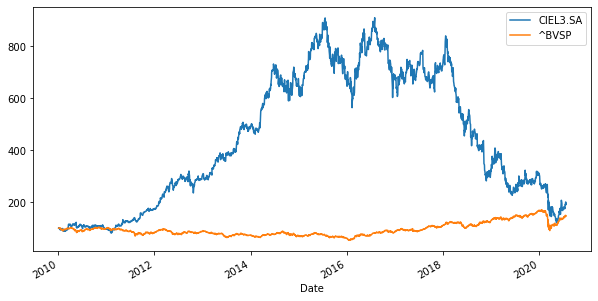

In [38]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [39]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [40]:
log_returns.mean() * 250

CIEL3.SA    0.062386
^BVSP       0.026327
dtype: float64

In [41]:
log_returns.cov() * 250

,CIEL3.SA,^BVSP
CIEL3.SA,0.147813,0.046704
^BVSP,0.046704,0.064976


In [42]:
log_returns.corr()

,CIEL3.SA,^BVSP
CIEL3.SA,1.000000,0.475421
^BVSP,0.475421,1.000000


In [43]:
num_assets = len(assets)

In [44]:
pesos = np.random.random(num_assets)
pesos /= np.sum(pesos)
pesos

array([0.90607594, 0.09392406])

Retorno esperado do portifolio

In [45]:
def retornoEsperado(pesos, log_returns):
    return np.sum(pesos * log_returns.mean()) * 250
    
print(retornoEsperado(pesos, log_returns))

0.05899917657263373


Variancia esperada do portifolio

In [46]:
def varianciaEsperada(pesos, log_returns):
    return np.dot(pesos.T, np.dot(log_returns.cov() * 250, pesos)) 

varianciaEsperada(pesos, log_returns)

0.12987322427025175

Volatilidade do portifolio

In [47]:
def volatilidade(pesos, log_returns):
    return np.sqrt(np.dot(pesos.T, np.dot(log_returns.cov() * 250, pesos)))

volatilidade(pesos, log_returns)

0.3603792783585812

In [48]:
portifolio_retorno = []
portifolio_volatilidade = []

for x in range(1000):
    pesos = np.random.random(num_assets)
    pesos /= np.sum(pesos)
    portifolio_retorno.append(retornoEsperado(pesos, log_returns))
    portifolio_volatilidade.append(volatilidade(pesos, log_returns))

In [49]:
portifolio_retorno_array = np.array(portifolio_retorno)
portifolio_volatilidade_array = np.array(portifolio_volatilidade)

In [55]:
portifolios = pd.DataFrame({
    'Retorno': portifolio_retorno_array,
    'Volatilidade': portifolio_volatilidade_array
})

Text(0, 0.5, 'Retorno Experado')

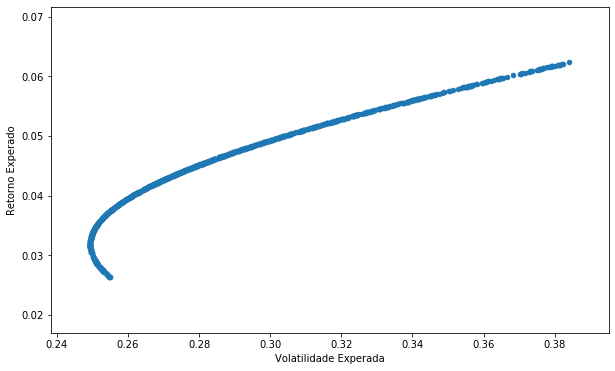

In [58]:
portifolios.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(10,6));
plt.xlabel('Volatilidade Experada')
plt.ylabel('Retorno Experado')